In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### A. Basic Data Cleaning
1. Read the file "Bank.csv", assign it a variable name "df" and display the first 5 lines. 

In [2]:
# Import dataset
bank_data_to_load = "Bank.csv"

# Read dataset
bank_data_df = pd.read_csv(bank_data_to_load)

In [3]:
# Display the data table for preview
bank_data_df.head(5)

,Age,Experience,Income,Branch Address,Family,CCAvg,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard,Advisor Name,Advisor Designation,Advisor Branch Addresses
0,50,24,11,234 Blue Spring Rd.,4,0.6,0,0,0,0,0,1,Carolin Whitmire,PFP,234 Blue Spring Rd.;533 Hillcrest Street;94 Co...
1,31,7,173,218 S. Westport Court,1,6,0,0,0,0,1,0,Marylee Bristow,PFP,218 S. Westport Court;9587 SW. Jefferson Stree...
2,41,16,10,9834 East Pineknoll Ave.,2,0.3,0,0,0,0,1,0,Corazon Eastin,PFP,336 Pin Oak Ave.;9834 East Pineknoll Ave.;742 ...
3,53,27,44,7330 West Grand St.,4,1.5,0,0,0,0,0,0,Beatriz Rolf,PFP,7330 West Grand St.;91 Lake Court;7041 East Ma...
4,29,5,33,36 Kent Court,1,1.8,78,0,0,0,1,0,Zofia Rambo,PFP,40 E. Dunbar Ave.;36 Kent Court;69 Spruce Dr.


2. Use `info` method to examine the data.

In [4]:
print(bank_data_df.shape)

(4499, 15)


In [5]:
print(bank_data_df.head)

<bound method NDFrame.head of       Age  Experience  Income            Branch Address  Family CCAvg  \
0      50          24      11       234 Blue Spring Rd.       4   0.6   
1      31           7     173     218 S. Westport Court       1     6   
2      41          16      10  9834 East Pineknoll Ave.       2   0.3   
3      53          27      44       7330 West Grand St.       4   1.5   
4      29           5      33             36 Kent Court       1   1.8   
...   ...         ...     ...                       ...     ...   ...   
4494   57          33      43          336 Pin Oak Ave.       1   1.8   
4495   62          37      19           9670 Wilson Rd.       3   0.5   
4496   29           3      53       387 West Fifth Ave.       4   1.8   
4497   42          18      43          336 Pin Oak Ave.       1   0.7   
4498   60          34      38   7041 East Mammoth Drive       3   2.2   

      Mortgage  Personal Loan  Brokerage Account  GIC Account  Online  \
0            0      

In [6]:
bank_data_df.info() # ensure no missing values, look at data types
# Issue: CCAvg should be an float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       4499 non-null   int64 
 1   Experience                4499 non-null   int64 
 2   Income                    4499 non-null   int64 
 3   Branch Address            4499 non-null   object
 4   Family                    4499 non-null   int64 
 5   CCAvg                     4499 non-null   object
 6   Mortgage                  4499 non-null   int64 
 7   Personal Loan             4499 non-null   int64 
 8   Brokerage Account         4499 non-null   int64 
 9   GIC Account               4499 non-null   int64 
 10  Online                    4499 non-null   int64 
 11  CreditCard                4499 non-null   int64 
 12  Advisor Name              4499 non-null   object
 13  Advisor Designation       4499 non-null   object
 14  Advisor Branch Addresses

In [7]:
bank_data_df.describe() 

,Age,Experience,Income,Family,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard
count,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000
mean,45.268282,20.028895,74.303401,2.398088,56.085575,0.106690,0.108691,0.064903,0.592132,0.296733
std,11.454680,11.461481,46.310561,1.147040,101.788264,0.308754,0.311286,0.246383,0.491493,0.456868
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,99.000000,3.000000,99.500000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,617.000000,1.000000,1.000000,1.000000,1.000000,1.000000


3. The values of column "CCAvg" is numeric but is stored as an object. Convert this column to numeric datatype.

In [8]:
# Check to see whether all values in 'CCAvg' column can be reassigned to float, print value if not
for obj in bank_data_df['CCAvg']:
    try:
        casted = float(obj)
    except:
        print('Invalid:', obj)

Invalid: 2,00


In [9]:
# Replace invalid object '2,00' with value 2.00
bank_data_df['CCAvg'] = bank_data_df['CCAvg'].replace(['2,00'], '2.00')

In [10]:
# Make each object in series a float
bank_data_df['CCAvg'] = bank_data_df['CCAvg'].astype(float)

In [11]:
# Check to ensure conversion worked
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4499 non-null   int64  
 1   Experience                4499 non-null   int64  
 2   Income                    4499 non-null   int64  
 3   Branch Address            4499 non-null   object 
 4   Family                    4499 non-null   int64  
 5   CCAvg                     4499 non-null   float64
 6   Mortgage                  4499 non-null   int64  
 7   Personal Loan             4499 non-null   int64  
 8   Brokerage Account         4499 non-null   int64  
 9   GIC Account               4499 non-null   int64  
 10  Online                    4499 non-null   int64  
 11  CreditCard                4499 non-null   int64  
 12  Advisor Name              4499 non-null   object 
 13  Advisor Designation       4499 non-null   object 
 14  Advisor 

In [12]:
# Replace invalid responses with None
for val in bank_data_df['Experience']:
    if val < 0:
        bank_data_df['Experience'].replace(val, None, inplace = True)

In [13]:
# Check to ensure replacement worked
print(bank_data_df['Experience'].describe())

count    4499.000000
mean       20.237831
std        11.316179
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64


4. Obtain summary stats of all numeric columns.

In [14]:
bank_data_df.describe() 

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard
count,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000
mean,45.268282,20.237831,74.303401,2.398088,1.951830,56.085575,0.106690,0.108691,0.064903,0.592132,0.296733
std,11.454680,11.316179,46.310561,1.147040,1.756476,101.788264,0.308754,0.311286,0.246383,0.491493,0.456868
min,23.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.600000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,99.000000,3.000000,2.600000,99.500000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,617.000000,1.000000,1.000000,1.000000,1.000000,1.000000


5. Do the statistical summaries makes sense for all columns? If not, for which columns does it not make sense? Convert the data type of these columns to `category`. Then, run the method `describe` on categorical columns only.

In [15]:
bank_data_df["Income"] = bank_data_df["Income"].astype("category")

In [16]:
bank_data_df["Online"] = bank_data_df["Online"].astype("category")

In [17]:
bank_data_df.describe(include=["category"])

,Income,Online
count,4499,4499
unique,162,2
top,38,1
freq,76,2664


In [18]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       4499 non-null   int64   
 1   Experience                4499 non-null   int64   
 2   Income                    4499 non-null   category
 3   Branch Address            4499 non-null   object  
 4   Family                    4499 non-null   int64   
 5   CCAvg                     4499 non-null   float64 
 6   Mortgage                  4499 non-null   int64   
 7   Personal Loan             4499 non-null   int64   
 8   Brokerage Account         4499 non-null   int64   
 9   GIC Account               4499 non-null   int64   
 10  Online                    4499 non-null   category
 11  CreditCard                4499 non-null   int64   
 12  Advisor Name              4499 non-null   object  
 13  Advisor Designation       4499 non-null   object

6. Check the frequency of unique values in column "Advisor Designation".

In [19]:
bank_data_df["Advisor Designation"].value_counts()

PFP    3386
CFP    1113
Name: Advisor Designation, dtype: int64

7. Create a new column called "CFP", whose value is 1 if "Advisor Designation" column has value "CFP"  otherwise the value is 0. This is one way of creating dummy variable. Hint: Utilize `np.where` method. 

In [20]:
bank_data_df["CFP"] = np.where(bank_data_df["Advisor Designation"] == "CFP",1,0)

In [24]:
bank_data_df.head(15)

,Age,Experience,Income,Branch Address,Family,CCAvg,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard,Advisor Name,Advisor Designation,Advisor Branch Addresses,CFP
0,50,24,11,234 Blue Spring Rd.,4,0.6,0,0,0,0,0,1,Carolin Whitmire,PFP,234 Blue Spring Rd.;533 Hillcrest Street;94 Co...,0
1,31,7,173,218 S. Westport Court,1,6.0,0,0,0,0,1,0,Marylee Bristow,PFP,218 S. Westport Court;9587 SW. Jefferson Stree...,0
2,41,16,10,9834 East Pineknoll Ave.,2,0.3,0,0,0,0,1,0,Corazon Eastin,PFP,336 Pin Oak Ave.;9834 East Pineknoll Ave.;742 ...,0
3,53,27,44,7330 West Grand St.,4,1.5,0,0,0,0,0,0,Beatriz Rolf,PFP,7330 West Grand St.;91 Lake Court;7041 East Ma...,0
4,29,5,33,36 Kent Court,1,1.8,78,0,0,0,1,0,Zofia Rambo,PFP,40 E. Dunbar Ave.;36 Kent Court;69 Spruce Dr.,0
5,52,27,85,667 E. Hall St.,3,3.4,0,1,0,0,0,0,Eulah Kicklighter,PFP,667 E. Hall St.;68 Sunbeam St.;7330 West Grand...,0
6,62,36,69,234 Blue Spring Rd.,2,1.7,0,0,0,0,1,0,Gala Mackson,CFP,8536 Country Club Dr.;234 Blue Spring Rd.;533 ...,1
7,47,21,20,667 E. Hall St.,1,0.2,0,0,0,0,1,1,Marcelene Thomson,PFP,9251 Old Vernon St.;667 E. Hall St.;68 Sunbeam...,0
8,47,21,79,8378 West Magnolia Street,3,1.1,185,0,0,0,1,1,Kathaleen Horgan,PFP,9091 S. Bowman Street;8378 West Magnolia Stree...,0
9,48,23,70,8376 Euclid Lane,1,2.8,0,0,0,0,0,0,Estefana Dungan,PFP,92 Ridgewood Dr.;8376 Euclid Lane;336 Pin Oak ...,0


In [25]:
print(bank_data_df['CFP'].describe())

count    4499.000000
mean        0.247388
std         0.431542
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: CFP, dtype: float64


8. Convert the datatype of columns with textual values to string.

In [26]:
bank_data_df["Branch Address"] = bank_data_df["Branch Address"].astype("string")

In [27]:
bank_data_df["Advisor Name"] = bank_data_df["Advisor Name"].astype("string")

In [28]:
bank_data_df["Advisor Branch Addresses"] = bank_data_df["Advisor Branch Addresses"].astype("string")

In [29]:
bank_data_df.describe(include=["string"])

,Branch Address,Advisor Name,Advisor Branch Addresses
count,4499,4499,4499
unique,43,49,43
top,24 Trusel Court,Donetta Mallet,597 Lawrence Street;9929 Thompson Lane;177 Win...
freq,159,111,196


In [30]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       4499 non-null   int64   
 1   Experience                4499 non-null   int64   
 2   Income                    4499 non-null   category
 3   Branch Address            4499 non-null   string  
 4   Family                    4499 non-null   int64   
 5   CCAvg                     4499 non-null   float64 
 6   Mortgage                  4499 non-null   int64   
 7   Personal Loan             4499 non-null   int64   
 8   Brokerage Account         4499 non-null   int64   
 9   GIC Account               4499 non-null   int64   
 10  Online                    4499 non-null   category
 11  CreditCard                4499 non-null   int64   
 12  Advisor Name              4499 non-null   string  
 13  Advisor Designation       4499 non-null   object

9. Notice that "Advisor Branch Addresses" column has multiple addresses. Expand the column such that each address is in a new column. Add these columns to the dataframe with appropriate name.

In [31]:
Advisor_branch_addresses = bank_data_df["Advisor Branch Addresses"]

In [32]:
print(Advisor_branch_addresses.shape)

(4499,)


In [33]:
print(Advisor_branch_addresses.head())

0    234 Blue Spring Rd.;533 Hillcrest Street;94 Co...
1    218 S. Westport Court;9587 SW. Jefferson Stree...
2    336 Pin Oak Ave.;9834 East Pineknoll Ave.;742 ...
3    7330 West Grand St.;91 Lake Court;7041 East Ma...
4        40 E. Dunbar Ave.;36 Kent Court;69 Spruce Dr.
Name: Advisor Branch Addresses, dtype: string


In [34]:
bank_data_df.loc[:,"branch_col"] = bank_data_df["Advisor Branch Addresses"]

In [35]:
bank_data_df

,Age,Experience,Income,Branch Address,Family,CCAvg,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard,Advisor Name,Advisor Designation,Advisor Branch Addresses,CFP,branch_col
0,50,24,11,234 Blue Spring Rd.,4,0.6,0,0,0,0,0,1,Carolin Whitmire,PFP,234 Blue Spring Rd.;533 Hillcrest Street;94 Co...,0,234 Blue Spring Rd.;533 Hillcrest Street;94 Co...
1,31,7,173,218 S. Westport Court,1,6.0,0,0,0,0,1,0,Marylee Bristow,PFP,218 S. Westport Court;9587 SW. Jefferson Stree...,0,218 S. Westport Court;9587 SW. Jefferson Stree...
2,41,16,10,9834 East Pineknoll Ave.,2,0.3,0,0,0,0,1,0,Corazon Eastin,PFP,336 Pin Oak Ave.;9834 East Pineknoll Ave.;742 ...,0,336 Pin Oak Ave.;9834 East Pineknoll Ave.;742 ...
3,53,27,44,7330 West Grand St.,4,1.5,0,0,0,0,0,0,Beatriz Rolf,PFP,7330 West Grand St.;91 Lake Court;7041 East Ma...,0,7330 West Grand St.;91 Lake Court;7041 East Ma...
4,29,5,33,36 Kent Court,1,1.8,78,0,0,0,1,0,Zofia Rambo,PFP,40 E. Dunbar Ave.;36 Kent Court;69 Spruce Dr.,0,40 E. Dunbar Ave.;36 Kent Court;69 Spruce Dr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,57,33,43,336 Pin Oak Ave.,1,1.8,0,0,0,0,0,0,Ross Seipel,PFP,8376 Euclid Lane;336 Pin Oak Ave.;9834 East Pi...,0,8376 Euclid Lane;336 Pin Oak Ave.;9834 East Pi...
4495,62,37,19,9670 Wilson Rd.,3,0.5,89,0,0,0,0,0,Weston Jeon,PFP,9587 SW. Jefferson Street;9670 Wilson Rd.;76 M...,0,9587 SW. Jefferson Street;9670 Wilson Rd.;76 M...
4496,29,3,53,387 West Fifth Ave.,4,1.8,0,0,0,0,1,0,Aleida Suitt,PFP,387 West Fifth Ave.;8536 Country Club Dr.;234 ...,0,387 West Fifth Ave.;8536 Country Club Dr.;234 ...
4497,42,18,43,336 Pin Oak Ave.,1,0.7,136,0,0,0,0,0,Corazon Eastin,PFP,336 Pin Oak Ave.;9834 East Pineknoll Ave.;742 ...,0,336 Pin Oak Ave.;9834 East Pineknoll Ave.;742 ...


In [36]:
by_branches = bank_data_df.groupby("Advisor Branch Addresses")

In [37]:
Count_by_branches = by_branches["Advisor Branch Addresses"].count()

In [38]:
print(Count_by_branches)

Advisor Branch Addresses
1 Poplar St.;8017 Homestead Ave.;387 West Fifth Ave.                   77
14 Lakeshore Lane;890 W. Brickyard Dr.;                                86
177 Winchester Street;20 Bradford Ave.;8573 Princeton Road             98
20 Bradford Ave.;8573 Princeton Road;4 Country Drive                  104
218 S. Westport Court;9587 SW. Jefferson Street;9670 Wilson Rd.       100
234 Blue Spring Rd.;533 Hillcrest Street;94 Country Club St.           94
24 Trusel Court;40 E. Dunbar Ave.;36 Kent Court                       191
33 Harrison Road;9251 Old Vernon St.;667 E. Hall St.                  187
336 Pin Oak Ave.;9834 East Pineknoll Ave.;742 Bridle Street            94
36 Kent Court;69 Spruce Dr.;92 Ridgewood Dr.                           96
36 South St.;9091 S. Bowman Street;8378 West Magnolia Street           92
387 West Fifth Ave.;8536 Country Club Dr.;234 Blue Spring Rd.          94
4 Country Drive;14 Lakeshore Lane;890 W. Brickyard Dr.                 76
40 E. Dunbar 

In [39]:
bank_data_df[["0","1","2"]] = bank_data_df["Advisor Branch Addresses"].str.split(';',expand=True)
bank_data_df

,Age,Experience,Income,Branch Address,Family,CCAvg,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard,Advisor Name,Advisor Designation,Advisor Branch Addresses,CFP,branch_col,0,1,2
0,50,24,11,234 Blue Spring Rd.,4,0.6,0,0,0,0,0,1,Carolin Whitmire,PFP,234 Blue Spring Rd.;533 Hillcrest Street;94 Co...,0,234 Blue Spring Rd.;533 Hillcrest Street;94 Co...,234 Blue Spring Rd.,533 Hillcrest Street,94 Country Club St.
1,31,7,173,218 S. Westport Court,1,6.0,0,0,0,0,1,0,Marylee Bristow,PFP,218 S. Westport Court;9587 SW. Jefferson Stree...,0,218 S. Westport Court;9587 SW. Jefferson Stree...,218 S. Westport Court,9587 SW. Jefferson Street,9670 Wilson Rd.
2,41,16,10,9834 East Pineknoll Ave.,2,0.3,0,0,0,0,1,0,Corazon Eastin,PFP,336 Pin Oak Ave.;9834 East Pineknoll Ave.;742 ...,0,336 Pin Oak Ave.;9834 East Pineknoll Ave.;742 ...,336 Pin Oak Ave.,9834 East Pineknoll Ave.,742 Bridle Street
3,53,27,44,7330 West Grand St.,4,1.5,0,0,0,0,0,0,Beatriz Rolf,PFP,7330 West Grand St.;91 Lake Court;7041 East Ma...,0,7330 West Grand St.;91 Lake Court;7041 East Ma...,7330 West Grand St.,91 Lake Court,7041 East Mammoth Drive
4,29,5,33,36 Kent Court,1,1.8,78,0,0,0,1,0,Zofia Rambo,PFP,40 E. Dunbar Ave.;36 Kent Court;69 Spruce Dr.,0,40 E. Dunbar Ave.;36 Kent Court;69 Spruce Dr.,40 E. Dunbar Ave.,36 Kent Court,69 Spruce Dr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,57,33,43,336 Pin Oak Ave.,1,1.8,0,0,0,0,0,0,Ross Seipel,PFP,8376 Euclid Lane;336 Pin Oak Ave.;9834 East Pi...,0,8376 Euclid Lane;336 Pin Oak Ave.;9834 East Pi...,8376 Euclid Lane,336 Pin Oak Ave.,9834 East Pineknoll Ave.
4495,62,37,19,9670 Wilson Rd.,3,0.5,89,0,0,0,0,0,Weston Jeon,PFP,9587 SW. Jefferson Street;9670 Wilson Rd.;76 M...,0,9587 SW. Jefferson Street;9670 Wilson Rd.;76 M...,9587 SW. Jefferson Street,9670 Wilson Rd.,76 Mayfair St.
4496,29,3,53,387 West Fifth Ave.,4,1.8,0,0,0,0,1,0,Aleida Suitt,PFP,387 West Fifth Ave.;8536 Country Club Dr.;234 ...,0,387 West Fifth Ave.;8536 Country Club Dr.;234 ...,387 West Fifth Ave.,8536 Country Club Dr.,234 Blue Spring Rd.
4497,42,18,43,336 Pin Oak Ave.,1,0.7,136,0,0,0,0,0,Corazon Eastin,PFP,336 Pin Oak Ave.;9834 East Pineknoll Ave.;742 ...,0,336 Pin Oak Ave.;9834 East Pineknoll Ave.;742 ...,336 Pin Oak Ave.,9834 East Pineknoll Ave.,742 Bridle Street


In [45]:
bank_data_df = bank_data_df.rename(columns = {"0":"Advisor Branch Address 1", "1":"Advisor Branch Address 2", "2":"Advisor Branch Address 3"})
bank_data_df

,Age,Experience,Income,Branch Address,Family,CCAvg,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard,Advisor Name,Advisor Designation,Advisor Branch Addresses,CFP,branch_col,Advisor Branch Address 1,Advisor Branch Address 2,Advisor Branch Address 3
0,50,24,11,234 Blue Spring Rd.,4,0.6,0,0,0,0,0,1,Carolin Whitmire,PFP,234 Blue Spring Rd.;533 Hillcrest Street;94 Co...,0,234 Blue Spring Rd.;533 Hillcrest Street;94 Co...,234 Blue Spring Rd.,533 Hillcrest Street,94 Country Club St.
1,31,7,173,218 S. Westport Court,1,6.0,0,0,0,0,1,0,Marylee Bristow,PFP,218 S. Westport Court;9587 SW. Jefferson Stree...,0,218 S. Westport Court;9587 SW. Jefferson Stree...,218 S. Westport Court,9587 SW. Jefferson Street,9670 Wilson Rd.
2,41,16,10,9834 East Pineknoll Ave.,2,0.3,0,0,0,0,1,0,Corazon Eastin,PFP,336 Pin Oak Ave.;9834 East Pineknoll Ave.;742 ...,0,336 Pin Oak Ave.;9834 East Pineknoll Ave.;742 ...,336 Pin Oak Ave.,9834 East Pineknoll Ave.,742 Bridle Street
3,53,27,44,7330 West Grand St.,4,1.5,0,0,0,0,0,0,Beatriz Rolf,PFP,7330 West Grand St.;91 Lake Court;7041 East Ma...,0,7330 West Grand St.;91 Lake Court;7041 East Ma...,7330 West Grand St.,91 Lake Court,7041 East Mammoth Drive
4,29,5,33,36 Kent Court,1,1.8,78,0,0,0,1,0,Zofia Rambo,PFP,40 E. Dunbar Ave.;36 Kent Court;69 Spruce Dr.,0,40 E. Dunbar Ave.;36 Kent Court;69 Spruce Dr.,40 E. Dunbar Ave.,36 Kent Court,69 Spruce Dr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,57,33,43,336 Pin Oak Ave.,1,1.8,0,0,0,0,0,0,Ross Seipel,PFP,8376 Euclid Lane;336 Pin Oak Ave.;9834 East Pi...,0,8376 Euclid Lane;336 Pin Oak Ave.;9834 East Pi...,8376 Euclid Lane,336 Pin Oak Ave.,9834 East Pineknoll Ave.
4495,62,37,19,9670 Wilson Rd.,3,0.5,89,0,0,0,0,0,Weston Jeon,PFP,9587 SW. Jefferson Street;9670 Wilson Rd.;76 M...,0,9587 SW. Jefferson Street;9670 Wilson Rd.;76 M...,9587 SW. Jefferson Street,9670 Wilson Rd.,76 Mayfair St.
4496,29,3,53,387 West Fifth Ave.,4,1.8,0,0,0,0,1,0,Aleida Suitt,PFP,387 West Fifth Ave.;8536 Country Club Dr.;234 ...,0,387 West Fifth Ave.;8536 Country Club Dr.;234 ...,387 West Fifth Ave.,8536 Country Club Dr.,234 Blue Spring Rd.
4497,42,18,43,336 Pin Oak Ave.,1,0.7,136,0,0,0,0,0,Corazon Eastin,PFP,336 Pin Oak Ave.;9834 East Pineknoll Ave.;742 ...,0,336 Pin Oak Ave.;9834 East Pineknoll Ave.;742 ...,336 Pin Oak Ave.,9834 East Pineknoll Ave.,742 Bridle Street


 10. Drop all original columns that now have duplicate information.


In [46]:
bank_data_df.drop(["Advisor Branch Addresses","branch_col"],axis=1)


,Age,Experience,Income,Branch Address,Family,CCAvg,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard,Advisor Name,Advisor Designation,CFP,Advisor Branch Address 1,Advisor Branch Address 2,Advisor Branch Address 3
0,50,24,11,234 Blue Spring Rd.,4,0.6,0,0,0,0,0,1,Carolin Whitmire,PFP,0,234 Blue Spring Rd.,533 Hillcrest Street,94 Country Club St.
1,31,7,173,218 S. Westport Court,1,6.0,0,0,0,0,1,0,Marylee Bristow,PFP,0,218 S. Westport Court,9587 SW. Jefferson Street,9670 Wilson Rd.
2,41,16,10,9834 East Pineknoll Ave.,2,0.3,0,0,0,0,1,0,Corazon Eastin,PFP,0,336 Pin Oak Ave.,9834 East Pineknoll Ave.,742 Bridle Street
3,53,27,44,7330 West Grand St.,4,1.5,0,0,0,0,0,0,Beatriz Rolf,PFP,0,7330 West Grand St.,91 Lake Court,7041 East Mammoth Drive
4,29,5,33,36 Kent Court,1,1.8,78,0,0,0,1,0,Zofia Rambo,PFP,0,40 E. Dunbar Ave.,36 Kent Court,69 Spruce Dr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,57,33,43,336 Pin Oak Ave.,1,1.8,0,0,0,0,0,0,Ross Seipel,PFP,0,8376 Euclid Lane,336 Pin Oak Ave.,9834 East Pineknoll Ave.
4495,62,37,19,9670 Wilson Rd.,3,0.5,89,0,0,0,0,0,Weston Jeon,PFP,0,9587 SW. Jefferson Street,9670 Wilson Rd.,76 Mayfair St.
4496,29,3,53,387 West Fifth Ave.,4,1.8,0,0,0,0,1,0,Aleida Suitt,PFP,0,387 West Fifth Ave.,8536 Country Club Dr.,234 Blue Spring Rd.
4497,42,18,43,336 Pin Oak Ave.,1,0.7,136,0,0,0,0,0,Corazon Eastin,PFP,0,336 Pin Oak Ave.,9834 East Pineknoll Ave.,742 Bridle Street


### B. Visual Data Exploration

Where applicable, please complete the codes provided by replacing items inside `<< >> `with appropriate code.

1. Create a box plot of "Age" column. Hint: Use `boxplot` method from `matplotlib` library. Also add title and axis labels using `title`, `xlabel` and `ylabel` mathods.Use `show` method to display the plot. 

In [ ]:
plt.boxplot(<<INSERT OBJECT TO PLOT HERE>>) 
plt.title(<<INSERT PLOT TITLE>>)
plt.ylabel(<<INSERT LABEL FOR Y-AXIS>>)
plt.xlabel(<<INSERT LABEL FOR X-AXIS>>)
plt.show()

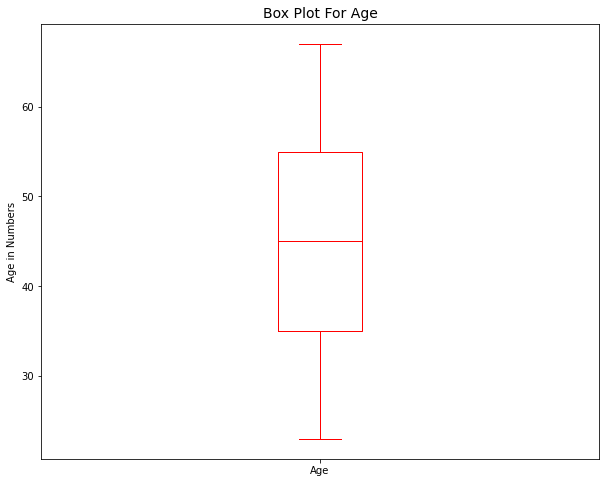

In [58]:
import matplotlib.pyplot as plt
bank_data_df["Age"].plot(kind= "box", figsize=(10,8), color = "red")
plt.title("Box Plot For Age", fontsize=14)
plt.xlabel("")
plt.ylabel("Age in Numbers")
plt.show()

2. Create a histogram of "Income" column. Set value of parameter `bins` to 50. Give title and axis labels to the figure. Use `show` method to diplay the plot. 

In [ ]:
plt.hist(<<INSERT OBJECT TO PLOT HERE>>, bins=<<INSERT NUMBER OF BINS>>)
plt.title(<<INSERT PLOT TITLE>>)
plt.ylabel(<<INSERT LABEL FOR Y-AXIS>>)
plt.xlabel(<<INSERT LABEL FOR X-AXIS>>)
plt.show()

In [59]:
from pathlib import Path

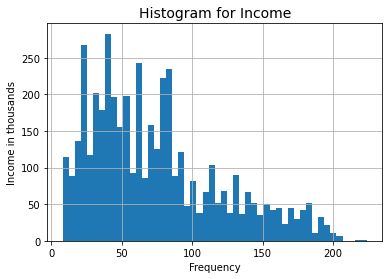

In [62]:
bank_data_df.plot.hist = bank_data_df["Income"].hist(bins=50)
plt.title("Histogram for Income", fontsize=14)
plt.ylabel("Income in thousands")
plt.xlabel("Frequency")
plt.show()

3. Create a bar plot that shows the number of customers who have banked online. 

In [ ]:
df[<<INSERT COLUMN NAME HERE>>].value_counts().plot(kind=<<INSERT TYPE OF PLOT>>)
plt.title(<<INSERT PLOT TITLE>>)
plt.ylabel(<<INSERT LABEL FOR Y-AXIS>>)
plt.xlabel(<<INSERT LABEL FOR X-AXIS>>)
plt.show()

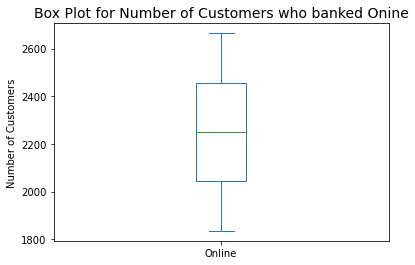

In [65]:
bank_data_df["Online"].value_counts().plot(kind="box")
plt.title("Box Plot for Number of Customers who banked Onine", fontsize=14)
plt.ylabel("Number of Customers")
plt.xlabel("")
plt.show()

The bank's main goal is to convert lenders into borrowers. For that, most of the analysis should be focused on identifying the differences between lenders and borrowers. 

4. Using `groupby` method, explore the make-up of customer with personal loan and GIC

In [69]:
bank_data_df.groupby(["Personal Loan", "GIC Account"], as_index=False).count()

,Personal Loan,GIC Account,Age,Experience,Income,Branch Address,Family,CCAvg,Mortgage,Brokerage Account,Online,CreditCard,Advisor Name,Advisor Designation,Advisor Branch Addresses,CFP,branch_col,Advisor Branch Address 1,Advisor Branch Address 2,Advisor Branch Address 3
0,0,0,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867,3867
1,0,1,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152
2,1,0,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340
3,1,1,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140


In [70]:
bank_data_df.groupby(["Personal Loan", "GIC Account"], as_index=False).sum()

,Personal Loan,GIC Account,Age,Experience,Family,CCAvg,Mortgage,Brokerage Account,CreditCard,CFP
0,0,0,175171,78486,9183,6624.200000,193934,338,1055,961
1,0,1,6859,3039,352,282.516667,9989,91,137,35
2,1,0,15188,6597,889,1310.733333,31317,9,50,90
3,1,1,6444,2928,365,563.833333,17089,51,93,27


5. Now take a look at how many customers accepted last campaign by age.

In [ ]:
df[<<INSERT COLUMN NAMES HERE>>].boxplot(by='Age')
plt.title(<<INSERT PLOT TITLE>>)
plt.ylabel(<<INSERT LABEL FOR Y-AXIS>>)
plt.xlabel(<<INSERT LABEL FOR X-AXIS>>)
plt.show()

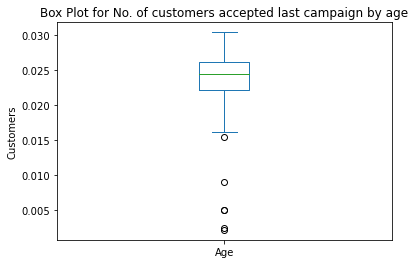

In [78]:
bank_data_df["Age"].value_counts("Personal Loan").plot(kind="box")
plt.title("Box Plot for No. of customers accepted last campaign by age")
plt.ylabel("Customers")
plt.xlabel("")
plt.show()

6. Finally, take a look at how many customer accepted last campaign by their income level. 

In [ ]:
df[<<INSERT COLUMN NAMES HERE>>].boxplot(by=<<INSERT COLUMN NAME HERE>>)
plt.title(<<INSERT PLOT TITLE>>)
plt.ylabel(<<INSERT LABEL FOR Y-AXIS>>)
plt.xlabel(<<INSERT LABEL FOR X-AXIS>>)
plt.show()

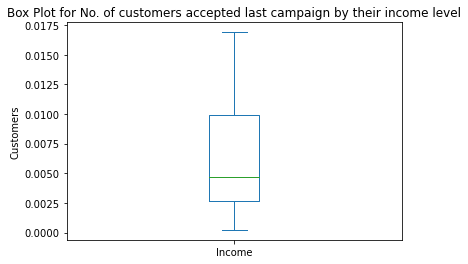

In [79]:
bank_data_df["Income"].value_counts("Personal Loan").plot(kind="box")
plt.title("Box Plot for No. of customers accepted last campaign by their income level")
plt.ylabel("Customers")
plt.xlabel("")
plt.show()

7. Create a plot to visualize customer's income distribution for groups who accepted the campaign against those who did not. Hint: look up `density` plot.

In [119]:
bank_data_df.loc['Personal Loan','Income'].plot(kind="kde", legend=True, label='Unsuccessful')
bank_data_df.loc['Personal Loan','Income'].plot(kind='kde', legend=True, label='Successful')
plt.title("")
plt.xlabel("")
plt.show()

KeyError: 'Personal Loan'

In [ ]:
bank_data_df.loc[<<INSERT LOGICAL EXPRESSION HERE>>,'Income'].plot(kind="kde", legend=True, label='Unsuccessful')
bank_data_d.loc[<<INSERT LOGICAL EXPRESSION HERE>>,'Income'].plot(kind='kde', legend=True, label='Successful')
plt.title(<<INSERT PLOT TITLE>>)
plt.xlabel(<<INSERT LABEL FOR X-AXIS>>)
plt.show()

8. Create a boxplot of average spending on credit card per month grouped by customer who accepted and did not accept personal loan campaigns.

In [ ]:
df[<<INSERT COLUMN NAMES HERE>>].boxplot(by=<<INSERT COLUMN NAME HERE>>)
plt.title(<<INSERT PLOT TITLE>>)
plt.ylabel(<<INSERT LABEL FOR Y-AXIS>>)
plt.xlabel(<<INSERT LABEL FOR X-AXIS>>)
plt.show()

In [131]:
bank_data_df["CreditCard"].boxplot(by=["Personal Loan" ==0])
plt.title("")
plt.ylabel("")
plt.xlabel("")
plt.show()

AttributeError: 'Series' object has no attribute 'boxplot'

### C. Business Analytics

1. How would you define a successful financial advisor? Based on that description, create a KPI "conversion rate". Who are your top 10 most successful financial advisors?

In [120]:
advisor_crosstab= pd.crosstab(bank_data_df["Personal Loan"], bank_data_df["Advisor Name"], margins=True)

In [121]:
print(advisor_crosstab)

Advisor Name   Aleida Suitt  Beatriz Rolf  Bernarda Guilliams  Berry Gartman  \
Personal Loan                                                                  
0                        83            82                  95             71   
1                        11            10                   9              6   
All                      94            92                 104             77   

Advisor Name   Brandon Sum  Caitlin Wimmer  Carolin Whitmire  Carylon Race  \
Personal Loan                                                                
0                       86              92                89            76   
1                       10               6                 5            12   
All                     96              98                94            88   

Advisor Name   Cecil Caves  Collene Dubon  ...  Thao Lovato  Twila Bare  \
Personal Loan                              ...                            
0                       88             77  ...           9

Advisor Name
Gita Pinelli          16
Kathaleen Horgan      15
Prudence Masters      15
Jacqueline Leveque    14
Corazon Eastin        13
Name: 1, dtype: int64
count    49.000000
mean      9.795918
std       2.629794
min       5.000000
25%       8.000000
50%      10.000000
75%      12.000000
max      16.000000
Name: 1, dtype: float64


(0.0, 20.0)

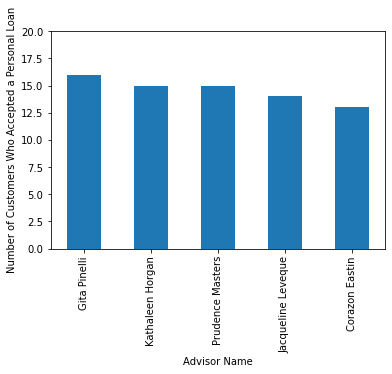

In [122]:
mostSuccessfulRaw = (advisor_crosstab.iloc[1]).sort_values(ascending = False)
mostSuccessfulRaw = mostSuccessfulRaw[1:] 

# remove "all" total row

print(mostSuccessfulRaw.head())
print(mostSuccessfulRaw.describe())
top5Raw = mostSuccessfulRaw.head() 
top5Raw.plot(kind = 'bar', stacked = True)
plt.ylabel("Number of Customers Who Accepted a Personal Loan")
plt.ylim((0,20))

In [123]:
bank_data_df["Advisor Name"].value_counts()


Donetta Mallet        111
Deedra Halderman      109
Cyndy Calcagno        105
Gita Pinelli          105
Ying Michaelson       104
Bernarda Guilliams    104
Twila Bare            103
Thao Lovato           101
Marcelene Thomson     101
Marylee Bristow       100
Tanya Johansen        100
Cecil Caves            99
Kirsten Mitchem        99
Jacqueline Leveque     98
Caitlin Wimmer         98
Pete Dickens           97
Vicki Sowers           96
Brandon Sum            96
Erik Clinard           96
Cyril Murry            95
Aleida Suitt           94
Zofia Rambo            94
Corazon Eastin         94
Kathaleen Horgan       94
Carolin Whitmire       94
Mariana Ghent          93
Latrisha Barden        92
Beatriz Rolf           92
Kristle Hanby          91
Gala Mackson           91
Ross Seipel            89
Siobhan Flaugher       89
Estefana Dungan        88
Carylon Race           88
Val Sauceda            86
Collene Dubon          84
Margret Lan            84
Jaquelyn Cubbage       83
Zandra Venne

2. Perform additional analysis to help you figure out which clients are most likely to convert on personal loan and which financial advisor should be allocated to convert them. 

In [126]:
# Frequency of advisors by customer
print(bank_data_df["Advisor Name"].value_counts())
mostSuccessfulTotal = ((mostSuccessfulRaw / bank_data_df["Advisor Name"].value_counts()).sort_values(ascending = False))*100

Donetta Mallet        111
Deedra Halderman      109
Cyndy Calcagno        105
Gita Pinelli          105
Ying Michaelson       104
Bernarda Guilliams    104
Twila Bare            103
Thao Lovato           101
Marcelene Thomson     101
Marylee Bristow       100
Tanya Johansen        100
Cecil Caves            99
Kirsten Mitchem        99
Jacqueline Leveque     98
Caitlin Wimmer         98
Pete Dickens           97
Vicki Sowers           96
Brandon Sum            96
Erik Clinard           96
Cyril Murry            95
Aleida Suitt           94
Zofia Rambo            94
Corazon Eastin         94
Kathaleen Horgan       94
Carolin Whitmire       94
Mariana Ghent          93
Latrisha Barden        92
Beatriz Rolf           92
Kristle Hanby          91
Gala Mackson           91
Ross Seipel            89
Siobhan Flaugher       89
Estefana Dungan        88
Carylon Race           88
Val Sauceda            86
Collene Dubon          84
Margret Lan            84
Jaquelyn Cubbage       83
Zandra Venne

Prudence Masters     18.292683
Kathaleen Horgan     15.957447
Gita Pinelli         15.238095
Eulah Kicklighter    14.814815
Jaquelyn Cubbage     14.457831
dtype: Float64
count    49.000000
mean     10.762798
std       3.004829
min       5.319149
25%       8.791209
50%      10.810811
75%      13.157895
max      18.292683
dtype: float64


(0.0, 20.0)

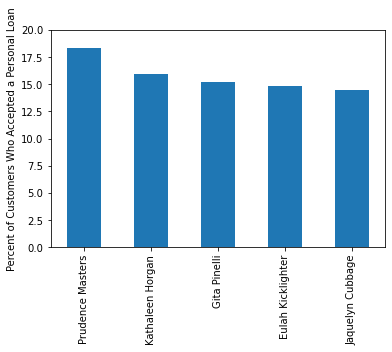

In [127]:
print(mostSuccessfulTotal.head(5))
print(mostSuccessfulTotal.describe())
top5Total = mostSuccessfulTotal.head()
top5Total.plot(kind = 'bar', stacked = True)
plt.ylabel("Percent of Customers Who Accepted a Personal Loan")
plt.ylim((0,20))